## Data Preparation

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('train_preprocess.tsv.txt', sep='\t', names = ['content', 'sentiment'])
df.head(10)

,content,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
5,"makanan beragam , harga makanan di food stall ...",positive
6,pakai kartu kredit bca tidak untung malah rugi...,negative
7,"tempat unik , bagus buat foto , makanan enak ,...",positive
8,saya bersama keluarga baru saja menikmati peng...,positive
9,bersyukur,positive


In [4]:
df.shape

(11000, 2)

## Kita cek isi datasetnya dan di dalamnya terdapat 11000 data. Terdiri dari

In [8]:
df.sentiment.value_counts()

sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

## Cleansing Dataset

In [9]:
import re

def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-z0-9A-Z]', ' ', string)
    return string

In [10]:
df['content_clean'] = df.content.apply(cleansing)

In [11]:
df.head(10)

,content,sentiment,content_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...
5,"makanan beragam , harga makanan di food stall ...",positive,makanan beragam harga makanan di food stall ...
6,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit bca tidak untung malah rugi...
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,tempat unik bagus buat foto makanan enak ...
8,saya bersama keluarga baru saja menikmati peng...,positive,saya bersama keluarga baru saja menikmati peng...
9,bersyukur,positive,bersyukur


In [19]:
neg = df.loc[df['sentiment'] == 'negative'].content_clean.tolist()
neu = df.loc[df['sentiment'] == 'neutral'].content_clean.tolist()
pos = df.loc[df['sentiment'] == 'positive'].content_clean.tolist()

neg_sentiment = df.loc[df['sentiment'] == 'negative'].sentiment.tolist()
neu_sentiment = df.loc[df['sentiment'] == 'neutral'].sentiment.tolist()
pos_sentiment = df.loc[df['sentiment'] == 'positive'].sentiment.tolist()

In [20]:
total_data = pos + neu + neg
sentiments = pos_sentiment + neu_sentiment + neg_sentiment

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))

Pos: 6416, Neu: 1148, Neg: 3436
Total data: 11000


## Feature Extraction

In [21]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [23]:
Y = pd.get_dummies(sentiments)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


In [24]:
Y

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [25]:
sentiments

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

## Split Dataset

In [26]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# **Training**

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Flatten
from keras import backend as K

In [28]:
import sys

# Check if a virtual environment is active
is_virtualenv = hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix)

if is_virtualenv:
    print("A virtual environment is active.")
else:
    print("No virtual environment is active.")


No virtual environment is active.


In [29]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [30]:
embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

adam = optimizers.Adam(lr = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)    
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])
# history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 96, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10042435 (38.31 MB)
Trainable params: 10042435 (38.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/10
880/880 [==============================] - 238s 267ms/step - loss: 0.4504 - accuracy: 0.8192 - val_loss: 0.3508 - val_accuracy: 0.8600
Epoch 2/10
880/880 [==============================] - 216s 245ms/step - loss: 0.2024 - accuracy: 0.9277 - val_loss: 0.3390 - val_accuracy: 0.8700
Epoch 3/10
880/880 [==============================] - 197s 224ms/step - loss: 0.1087 - accuracy: 0.9568 - val_loss: 0.4307 - val_accuracy: 0.8695
Epoch 4/10
880/880 [==============================] - 231s 263ms/step - loss: 0.0678 - accuracy: 0.9710 - val_loss: 0.4968 - val_accuracy: 0.8614
Epoch 4: early stopping


## Evaluation

In [31]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 3s 28ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       685
           1       0.80      0.75      0.77       233
           2       0.91      0.89      0.90      1282

    accuracy                           0.86      2200
   macro avg       0.84      0.83      0.83      2200
weighted avg       0.86      0.86      0.86      2200



## Cross Validation

In [32]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = Y

embed_dim = 100
units = 64

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.5))
    model.add(Dense(3,activation='softmax'))
    sgd = optimizers.Adam(learning_rate= 0.0001)
    model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

    predictions = model.predict(X_test)
    y_pred = predictions

    # for the current fold only    
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Epoch 1/10
880/880 [==============================] - 244s 274ms/step - loss: 0.4698 - accuracy: 0.8108 - val_loss: 0.3470 - val_accuracy: 0.8673
Epoch 2/10
880/880 [==============================] - 230s 261ms/step - loss: 0.2258 - accuracy: 0.9183 - val_loss: 0.3489 - val_accuracy: 0.8777
Epoch 3/10
880/880 [==============================] - 225s 256ms/step - loss: 0.1316 - accuracy: 0.9502 - val_loss: 0.3825 - val_accuracy: 0.8755
Epoch 3: early stopping
69/69 [==============================] - 2s 24ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       685
           1       0.82      0.80      0.81       233
           2       0.91      0.91      0.91      1282

    accuracy                           0.88      2200
   macro avg       0.85      0.85      0.85      2200
weighted avg       0.88      0.88      0.88      2200



Epoch 1/10
880/880 [==============================] - 198s 222ms/step - loss: 0.4698 - accuracy: 0.8178 - val_loss: 0.3500 - val_accuracy: 0.8645
Epoch 2/10
880/880 [==============================] - 189s 215ms/step - loss: 0.2244 - accuracy: 0.9178 - val_loss: 0.3356 - val_accuracy: 0.8777
Epoch 3/10
880/880 [==============================] - 204s 232ms/step - loss: 0.1327 - accuracy: 0.9489 - val_loss: 0.3901 - val_accuracy: 0.8759
Epoch 4/10
880/880 [==============================] - 213s 242ms/step - loss: 0.0940 - accuracy: 0.9647 - val_loss: 0.4410 - val_accuracy: 0.8468
Epoch 4: early stopping
69/69 [==============================] - 3s 25ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       685
           1       0.72      0.82      0.76       233
           2       0.91      0.87      0.89      1282

    accuracy                           0.85      2200
   macro avg       0.80      0.83      0.82      22

Epoch 1/10
880/880 [==============================] - 235s 264ms/step - loss: 0.4717 - accuracy: 0.8141 - val_loss: 0.3331 - val_accuracy: 0.8727
Epoch 2/10
880/880 [==============================] - 232s 263ms/step - loss: 0.2264 - accuracy: 0.9164 - val_loss: 0.3288 - val_accuracy: 0.8832
Epoch 3/10
880/880 [==============================] - 171s 194ms/step - loss: 0.1326 - accuracy: 0.9519 - val_loss: 0.3667 - val_accuracy: 0.8700
Epoch 4/10
880/880 [==============================] - 172s 195ms/step - loss: 0.0901 - accuracy: 0.9647 - val_loss: 0.4112 - val_accuracy: 0.8723
Epoch 4: early stopping
69/69 [==============================] - 2s 20ms/step
Training ke- 3
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       685
           1       0.83      0.76      0.80       233
           2       0.91      0.91      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.85      0.84      0.84      22

Epoch 1/10
880/880 [==============================] - 181s 203ms/step - loss: 0.4776 - accuracy: 0.8092 - val_loss: 0.3313 - val_accuracy: 0.8750
Epoch 2/10
880/880 [==============================] - 169s 192ms/step - loss: 0.2311 - accuracy: 0.9123 - val_loss: 0.3254 - val_accuracy: 0.8782
Epoch 3/10
880/880 [==============================] - 172s 195ms/step - loss: 0.1335 - accuracy: 0.9494 - val_loss: 0.3916 - val_accuracy: 0.8682
Epoch 4/10
880/880 [==============================] - 173s 196ms/step - loss: 0.0882 - accuracy: 0.9655 - val_loss: 0.4528 - val_accuracy: 0.8682
Epoch 4: early stopping
69/69 [==============================] - 2s 24ms/step
Training ke- 4
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       685
           1       0.82      0.72      0.77       233
           2       0.89      0.92      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.85      0.82      0.83      22

Epoch 1/10
880/880 [==============================] - 187s 205ms/step - loss: 0.4799 - accuracy: 0.8070 - val_loss: 0.3574 - val_accuracy: 0.8695
Epoch 2/10
880/880 [==============================] - 171s 194ms/step - loss: 0.2297 - accuracy: 0.9137 - val_loss: 0.3392 - val_accuracy: 0.8759
Epoch 3/10
880/880 [==============================] - 173s 197ms/step - loss: 0.1349 - accuracy: 0.9500 - val_loss: 0.3876 - val_accuracy: 0.8691
Epoch 4/10
880/880 [==============================] - 168s 191ms/step - loss: 0.0882 - accuracy: 0.9642 - val_loss: 0.3985 - val_accuracy: 0.8668
Epoch 4: early stopping
69/69 [==============================] - 4s 23ms/step
Training ke- 5
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       685
           1       0.83      0.78      0.81       233
           2       0.90      0.90      0.90      1282

    accuracy                           0.87      2200
   macro avg       0.85      0.84      0.84      22

Hasilnya nilai rata-rata accuracy pada angka 0.86. Ini menunjukkan model kita cukup stabil pada angka 0.86.

## Visualization

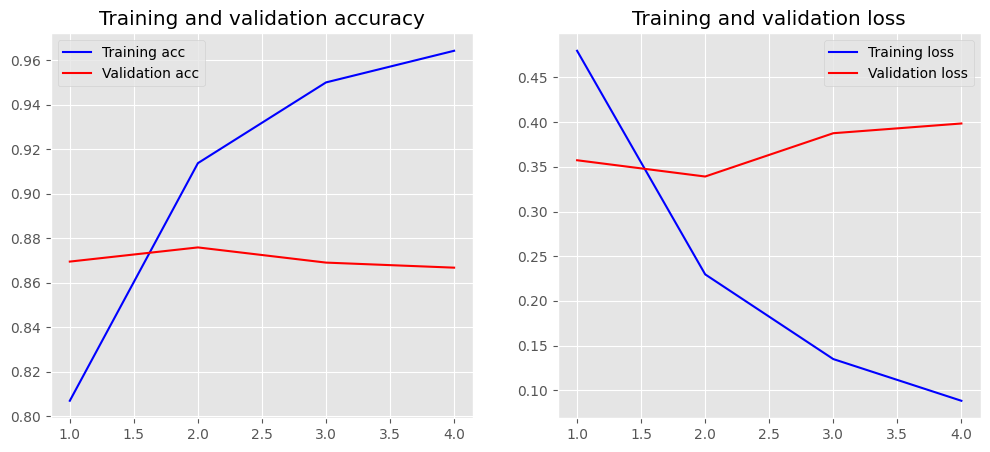

In [33]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [34]:
model.save('model.platinum_kelompok3')
print("Model has created!")

INFO:tensorflow:Assets written to: model.platinum_kelompok3\assets


INFO:tensorflow:Assets written to: model.platinum_kelompok3\assets


Model has created!


In [37]:
import re 
from keras.models import load_model

input_text = """
syukurlah.
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.platinum_kelompok3')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 529ms/step
Text:   syukurlah  
Sentiment:  positive


In [38]:
import re 
from keras.models import load_model

input_text = """
disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego 
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.platinum_kelompok3')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 0s 377ms/step
Text:   disaat semua cowok berusaha melacak perhatian gue  loe lantas remehkan perhatian yg gue kasih khusus ke elo  basic elo cowok bego  
Sentiment:  negative


In [39]:
import re 
from keras.models import load_model

input_text = """
Susilo Bambang Yudhoyono Presiden RI ke 6 meminta Khofifah Emil untuk dekat dengan masyarakat 
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.platinum_kelompok3')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 0s 499ms/step
Text:   susilo bambang yudhoyono presiden ri ke 6 meminta khofifah emil untuk dekat dengan masyarakat  
Sentiment:  neutral
